# Modelo de subasta

In [1]:
# Librerías
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("../data/ebay.csv")

df = df.rename(columns={
    df.columns[0]: 'id_subasta',
    df.columns[1]: 'monto_puja',
    df.columns[2]: 'tiempo_puja',
    df.columns[3]: 'user_postor',
    df.columns[4]: 'reputacion_postor',
    df.columns[5]: 'precio_inicial',
    df.columns[6]: 'precio_final',
    df.columns[7]: 'producto',
    df.columns[8]: 'tipo_subasta'
})
df

,id_subasta,monto_puja,tiempo_puja,user_postor,reputacion_postor,precio_inicial,precio_final,producto,tipo_subasta
0,8213034705,115.00,2.943484,davidbresler2,1,95.00,117.5,xbox,3
1,8213034705,100.00,2.951285,gladimacowgirl,58,95.00,117.5,xbox,3
2,8213034705,117.50,2.998947,daysrus,10,95.00,117.5,xbox,3
3,8213060420,2.00,0.065266,donnie4814,5,1.00,120.0,xbox,3
4,8213060420,15.25,0.123218,myreeceyboy,52,1.00,120.0,xbox,3
...,...,...,...,...,...,...,...,...,...
10648,3406945791,220.00,6.607860,robb1069,3,9.99,232.5,palm,7
10649,3406945791,225.00,6.607990,robb1069,3,9.99,232.5,palm,7
10650,3406945791,230.00,6.608150,robb1069,3,9.99,232.5,palm,7
10651,3406945791,230.00,6.676380,jaguarhw,1,9.99,232.5,palm,7


Descripción de columnas:

- `id_subasta`: Identificador único de la subasta.
- `monto_puja`: Monto de la oferta realizada por el postor.
- `tiempo_puja`: Tiempo en que se realizó la puja (medido en días desde el inicio de la subasta).
- `user_postor`: Identificador del postor (usuario).
- `reputacion_postor`: Calificación o reputación del postor al momento de la puja.
- `precio_inicial`: Monto de la oferta inicial de la subasta.
- `precio_final`: Precio final alcanzado por el producto al cerrar la subasta.
- `producto`: Tipo o categoría del producto subastado (por ejemplo, palm, xbox, etc.).
- `tipo_subasta`: Tipo de subasta según configuración (valor numérico que puede representar duración o modalidad).


## Analisis Exploratorio

In [3]:
# Revisar tipos de datos
df.dtypes

id_subasta             int64
monto_puja           float64
tiempo_puja          float64
user_postor           object
reputacion_postor      int64
precio_inicial       float64
precio_final         float64
producto              object
tipo_subasta           int64
dtype: object

In [4]:
df['id_subasta'] = df['id_subasta'].astype('category')


In [5]:
# Revisar tipos de datos
df.dtypes

id_subasta           category
monto_puja            float64
tiempo_puja           float64
user_postor            object
reputacion_postor       int64
precio_inicial        float64
precio_final          float64
producto               object
tipo_subasta            int64
dtype: object

In [6]:
# Revisión de nulos
df.isnull().sum()

id_subasta           0
monto_puja           0
tiempo_puja          0
user_postor          0
reputacion_postor    0
precio_inicial       0
precio_final         0
producto             0
tipo_subasta         0
dtype: int64

In [7]:
# Ver cuántas filas duplicadas hay
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

# (Opcional) Ver las filas duplicadas
df_duplicadas = df[df.duplicated()]
df_duplicadas.head()

Número de filas duplicadas: 0


,id_subasta,monto_puja,tiempo_puja,user_postor,reputacion_postor,precio_inicial,precio_final,producto,tipo_subasta


In [8]:
# Estadísticas básicas
df.describe().round(2)

,monto_puja,tiempo_puja,reputacion_postor,precio_inicial,precio_final,tipo_subasta
count,10653.00,10653.00,10653.00,10653.00,10653.00,10653.00
mean,207.95,3.98,31.99,52.36,335.66,5.94
std,323.38,2.35,120.68,168.66,433.95,1.58
min,0.01,0.00,-4.00,0.01,26.00,3.00
25%,72.00,1.95,1.00,1.00,187.52,5.00
50%,140.00,4.13,5.00,4.99,229.04,7.00
75%,210.00,6.44,21.00,50.00,255.00,7.00
max,5400.00,7.00,3140.00,5000.00,5400.00,7.00


---

### Dejaremos solo valores 0 a 100 la columna ``reputacion_postor``

In [9]:
df['reputacion_postor'] = df['reputacion_postor'].clip(lower=0, upper=100)
df

,id_subasta,monto_puja,tiempo_puja,user_postor,reputacion_postor,precio_inicial,precio_final,producto,tipo_subasta
0,8213034705,115.00,2.943484,davidbresler2,1,95.00,117.5,xbox,3
1,8213034705,100.00,2.951285,gladimacowgirl,58,95.00,117.5,xbox,3
2,8213034705,117.50,2.998947,daysrus,10,95.00,117.5,xbox,3
3,8213060420,2.00,0.065266,donnie4814,5,1.00,120.0,xbox,3
4,8213060420,15.25,0.123218,myreeceyboy,52,1.00,120.0,xbox,3
...,...,...,...,...,...,...,...,...,...
10648,3406945791,220.00,6.607860,robb1069,3,9.99,232.5,palm,7
10649,3406945791,225.00,6.607990,robb1069,3,9.99,232.5,palm,7
10650,3406945791,230.00,6.608150,robb1069,3,9.99,232.5,palm,7
10651,3406945791,230.00,6.676380,jaguarhw,1,9.99,232.5,palm,7


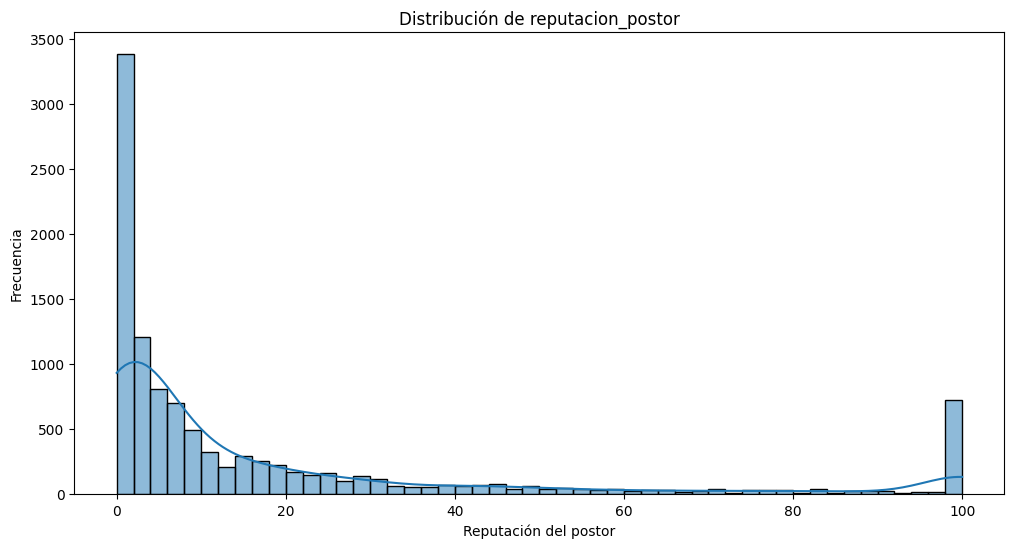

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df['reputacion_postor'], bins=50, kde=True)
plt.title('Distribución de reputacion_postor')
plt.xlabel('Reputación del postor')
plt.ylabel('Frecuencia')
plt.show()


---

In [11]:
# Estadísticas básicas
df.describe().round(2)

,monto_puja,tiempo_puja,reputacion_postor,precio_inicial,precio_final,tipo_subasta
count,10653.00,10653.00,10653.00,10653.00,10653.00,10653.00
mean,207.95,3.98,18.38,52.36,335.66,5.94
std,323.38,2.35,28.58,168.66,433.95,1.58
min,0.01,0.00,0.00,0.01,26.00,3.00
25%,72.00,1.95,1.00,1.00,187.52,5.00
50%,140.00,4.13,5.00,4.99,229.04,7.00
75%,210.00,6.44,21.00,50.00,255.00,7.00
max,5400.00,7.00,100.00,5000.00,5400.00,7.00


### Crear una columna en log de la variable ``monto_puja``

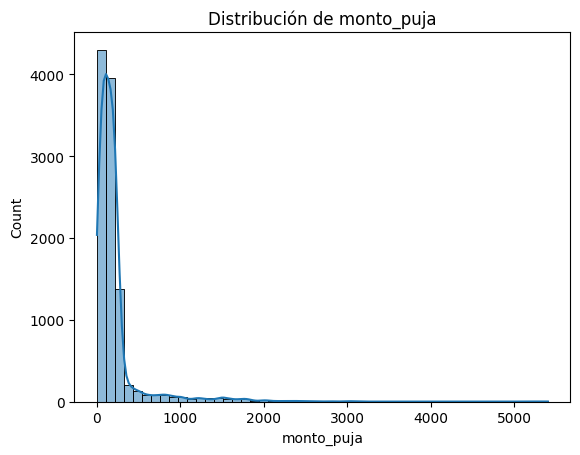

In [12]:
# Visualizar distribución
sns.histplot(df['monto_puja'], bins=50, kde=True)
plt.title('Distribución de monto_puja')
plt.show()

In [13]:
# Capping a un máximo (ej: 1000) o transformar
df['monto_puja'] = df['monto_puja'].clip(upper=1000)
# También puedes probar log-transform
df['monto_puja_log'] = np.log1p(df['monto_puja'])

### Crear una columna en log de la variable ``openbid``

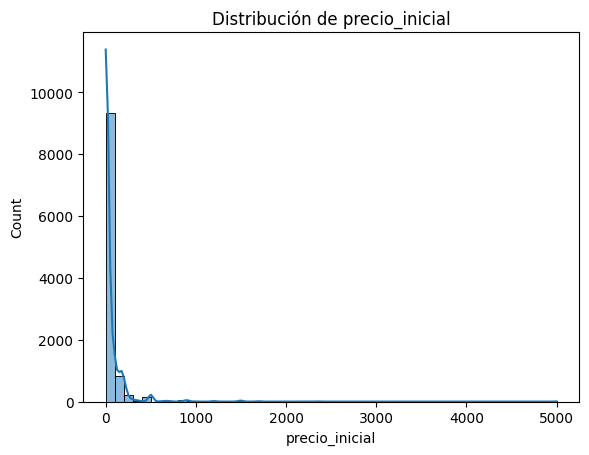

In [14]:
sns.histplot(df['precio_inicial'], bins=50, kde=True)
plt.title('Distribución de precio_inicial')
plt.show()

In [15]:
# Capping: limitar a un máximo razonable (ej: 500)
df['precio_inicial'] = df['precio_inicial'].clip(upper=1000)

# Opción alternativa: aplicar log-transform si hay muchos valores extremos

df['precio_inicial_log'] = np.log1p(df['precio_inicial'])  # crea nueva variable log-transformada

In [16]:
# Estadísticas básicas
df.describe().round(2)

,monto_puja,tiempo_puja,reputacion_postor,precio_inicial,precio_final,tipo_subasta,monto_puja_log,precio_inicial_log
count,10653.00,10653.00,10653.00,10653.00,10653.00,10653.00,10653.00,10653.00
mean,186.27,3.98,18.38,48.71,335.66,5.94,4.75,2.11
std,207.53,2.35,28.58,118.20,433.95,1.58,1.09,1.91
min,0.01,0.00,0.00,0.01,26.00,3.00,0.01,0.01
25%,72.00,1.95,1.00,1.00,187.52,5.00,4.29,0.69
50%,140.00,4.13,5.00,4.99,229.04,7.00,4.95,1.79
75%,210.00,6.44,21.00,50.00,255.00,7.00,5.35,3.93
max,1000.00,7.00,100.00,1000.00,5400.00,7.00,6.91,6.91


### Agrupar por subasta ( ``id_subasta``)

In [17]:
# 1) Identificar filas ganadoras por subasta (máximo monto_puja)
idx_ganadores = df.groupby('id_subasta')['monto_puja'].idxmax()

# 2) Extraer info del postor ganador (en español)
df_ganadores = df.loc[idx_ganadores, ['id_subasta', 'user_postor', 'reputacion_postor', 'tiempo_puja']].copy()
df_ganadores = df_ganadores.rename(columns={
    'postor': 'postor_ganador',
    'reputacion_postor': 'reputacion_ganador',
    'tiempo_puja': 'tiempo_ganador'
})


df_ganadores

C:\Users\jeane_bkpplgv\AppData\Local\Temp\ipykernel_19088\3238002643.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  idx_ganadores = df.groupby('id_subasta')['monto_puja'].idxmax()


,id_subasta,user_postor,reputacion_ganador,tiempo_ganador
3391,1638843936,carloss8055,5,5.226377
3396,1638844284,njbirdmom,33,1.252407
3412,1638844464,adammurry,5,6.999745
3423,1638844729,sylvesterii,82,6.999213
2787,1638893549,eli.flint@flightsafety.co,4,2.909826
...,...,...,...,...
490,8215558653,wattscrew1,8,2.999815
509,8215571039,lambonius1,0,2.997442
526,8215582227,ultimatum_man,2,2.999664
537,8215605488,pgauctions,16,2.586493


In [21]:
# Agregar por subasta: solo las variables que usaremos en el modelo
df_agg = (df.groupby('id_subasta')
            .agg(
                precio_inicial=('precio_inicial', 'first'),
                precio_final=('precio_final', 'max'),
                reputacion_prom=('reputacion_postor', 'mean'),
                producto=('producto', 'first'),
                tipo_subasta=('tipo_subasta', 'first')
            )
            .reset_index())

# Contar postores únicos y número de pujas
df_postores_pujas = (df.groupby('id_subasta')
                       .agg(n_postores=('user_postor', 'nunique'),
                            n_pujas=('user_postor', 'count'))
                       .reset_index())

# Merge final
df_agg = df_agg.merge(df_postores_pujas, on='id_subasta', how='left')

df_agg.head()


C:\Users\jeane_bkpplgv\AppData\Local\Temp\ipykernel_19088\2223592367.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = (df.groupby('id_subasta')
C:\Users\jeane_bkpplgv\AppData\Local\Temp\ipykernel_19088\2223592367.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_postores_pujas = (df.groupby('id_subasta')


,id_subasta,precio_inicial,precio_final,reputacion_prom,producto,tipo_subasta,n_postores,n_pujas
0,1638843936,500.0,1625.0,26.857143,cartier,7,5,7
1,1638844284,200.0,500.0,16.500000,cartier,7,2,2
2,1638844464,300.0,740.0,9.125000,cartier,7,5,16
3,1638844729,225.0,320.0,29.636364,cartier,7,2,11
4,1638893549,99.0,177.5,1.600000,cartier,3,4,5


In [28]:
# ===== 4) Construir dataset para el MODELO (features sin fuga) =====
# Nos quedamos solo con columnas "realistas"
cols_modelo_base = [
    'precio_inicial',
    'reputacion_prom',
    'n_postores',
    'n_pujas',
    'producto',
    'tipo_subasta',
    'precio_final'   # target
]
df_modelo = df_agg[cols_modelo_base].copy()
df_modelo.head()


,precio_inicial,reputacion_prom,n_postores,n_pujas,producto,tipo_subasta,precio_final
0,500.0,26.857143,5,7,cartier,7,1625.0
1,200.0,16.500000,2,2,cartier,7,500.0
2,300.0,9.125000,5,16,cartier,7,740.0
3,225.0,29.636364,2,11,cartier,7,320.0
4,99.0,1.600000,4,5,cartier,3,177.5


In [29]:
# 1) Tipos y limpieza
df_modelo = df_modelo.copy()

# Asegurar dtypes numéricos
num_cols = ['precio_inicial','reputacion_prom','n_postores','n_pujas','precio_final']
for c in num_cols:
    df_modelo[c] = pd.to_numeric(df_modelo[c], errors='coerce')

# Quitar filas con NaN en columnas clave
df_modelo = df_modelo.dropna(subset=num_cols)

# Categóricas como string
df_modelo['producto'] = df_modelo['producto'].astype(str)
df_modelo['tipo_subasta'] = df_modelo['tipo_subasta'].astype(str)

# Filtrar solo productos válidos
items_validos = {'cartier','palm','xbox'}
df_modelo = df_modelo[df_modelo['producto'].isin(items_validos)]

# 2) Logs
df_modelo['precio_inicial_log'] = np.log1p(df_modelo['precio_inicial'])
df_modelo['n_postores_log']     = np.log1p(df_modelo['n_postores'])
df_modelo['n_pujas_log']        = np.log1p(df_modelo['n_pujas'])

# 3) Capping simple
for c in ['precio_inicial_log','reputacion_prom','n_postores_log','n_pujas_log']:
    p99 = df_modelo[c].quantile(0.99)
    df_modelo[c] = np.minimum(df_modelo[c], p99)

# 4) One-hot encoding para producto y tipo_subasta
df_modelo = pd.get_dummies(df_modelo,
                           columns=['producto','tipo_subasta'],
                           drop_first=False)

# 5) Definir X, y
features_finales = [
    'precio_inicial_log', 'reputacion_prom',
    'n_postores_log', 'n_pujas_log',
    'producto_palm', 'producto_xbox', 'producto_cartier',
    'tipo_subasta_5', 'tipo_subasta_7'
]

# asegurar que todas las columnas existan (si no, se crean en 0)
for col in features_finales:
    if col not in df_modelo:
        df_modelo[col] = 0

X = df_modelo[features_finales].copy()
y = df_modelo['precio_final'].astype(float)

print("Features finales:", features_finales)
print("X.shape:", X.shape, "| y.shape:", y.shape)



Features finales: ['precio_inicial_log', 'reputacion_prom', 'n_postores_log', 'n_pujas_log', 'producto_palm', 'producto_xbox', 'producto_cartier', 'tipo_subasta_5', 'tipo_subasta_7']
X.shape: (627, 9) | y.shape: (627,)


In [26]:
df['tipo_subasta'].unique()

array([3, 5, 7])

In [30]:
X

,precio_inicial_log,reputacion_prom,n_postores_log,n_pujas_log,producto_palm,producto_xbox,producto_cartier,tipo_subasta_5,tipo_subasta_7
0,6.216606,26.857143,1.791759,2.079442,False,False,True,False,True
1,5.303305,16.500000,1.098612,1.098612,False,False,True,False,True
2,5.707110,9.125000,1.791759,2.833213,False,False,True,False,True
3,5.420535,29.636364,1.098612,2.484907,False,False,True,False,True
4,4.605170,1.600000,1.609438,1.791759,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
622,4.025352,8.285714,2.302585,2.708050,False,True,False,False,False
623,3.931826,0.600000,1.609438,3.044522,False,True,False,False,False
624,4.110874,6.125000,2.079442,2.833213,False,True,False,False,False
625,0.688135,39.454545,2.397895,2.484907,False,True,False,False,False


## Modelo RandomForestRegressor 

Se utiliza un modelo supervisado de regresión, específicamente un Random Forest Regressor, para predecir el precio final de una subasta a partir de variables como el precio inicial, la puja máxima, la reputación de los postores y el tipo de producto. Este modelo es ideal porque maneja bien relaciones no lineales, outliers y variables mixtas, ofreciendo predicciones precisas y buena interpretabilidad.


## Modelo GradientBoostingRegressor 

Se utilizó un modelo Gradient Boosting Regressor, un algoritmo supervisado de regresión que construye árboles de forma secuencial, corrigiendo los errores del modelo anterior en cada paso. Es especialmente útil cuando se busca alta precisión, ya que combina muchos árboles débiles para formar un modelo fuerte. Se eligió este modelo porque suele superar en rendimiento a Random Forest en datasets estructurados, capturando relaciones complejas y reduciendo errores de predicción.

## Modelo Regresión simple 

In [31]:
# 1. Separar datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Entrenar los tres modelos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# 3. Evaluar con R²
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, rf_model.predict(X_test))
r2_gb = r2_score(y_test, gb_model.predict(X_test))
r2_lr = r2_score(y_test, lr_model.predict(X_test))

print(f"Random Forest R²: {r2_rf:.2f}")
print(f"Gradient Boosting R²: {r2_gb:.2f}")
print(f"Regresión Lineal R²: {r2_lr:.2f}")


Random Forest R²: 0.65
Gradient Boosting R²: 0.52
Regresión Lineal R²: 0.46


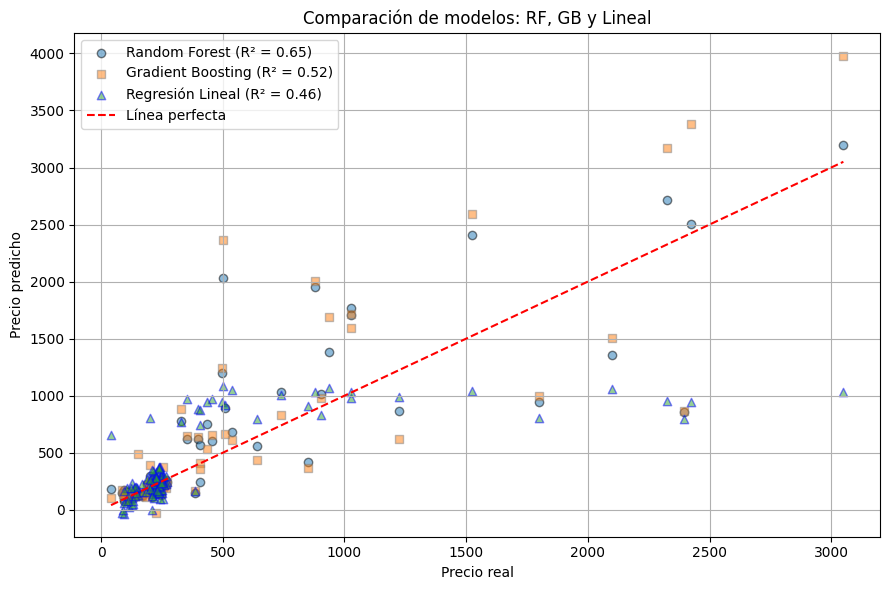

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# --- Predicciones ---
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

# --- R² ---
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_lr = r2_score(y_test, y_pred_lr)

# --- Gráfico ---
plt.figure(figsize=(9, 6))

# Random Forest
plt.scatter(y_test, y_pred_rf, alpha=0.5, 
            label=f'Random Forest (R² = {r2_rf:.2f})', edgecolors='k')

# Gradient Boosting
plt.scatter(y_test, y_pred_gb, alpha=0.5, 
            label=f'Gradient Boosting (R² = {r2_gb:.2f})', 
            edgecolors='gray', marker='s')

# Regresión Lineal
plt.scatter(y_test, y_pred_lr, alpha=0.5, 
            label=f'Regresión Lineal (R² = {r2_lr:.2f})', 
            edgecolors='blue', marker='^')

# Línea perfecta
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         '--r', label='Línea perfecta')

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación de modelos: RF, GB y Lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Simulación

In [39]:
def transformar_entrada(subasta_dict):
    """
    Transforma un diccionario de subasta en un DataFrame
    con las mismas columnas usadas en el entrenamiento.
    """
    row = {}

    # log de precio inicial
    row["precio_inicial_log"] = np.log1p(subasta_dict["precio_inicial"])

    # log de n_postores y n_pujas
    row["n_postores_log"] = np.log1p(subasta_dict.get("n_postores", 1))
    row["n_pujas_log"]    = np.log1p(subasta_dict.get("n_pujas", 1))

    # reputación promedio
    row["reputacion_prom"] = subasta_dict["reputacion_prom"]

    # dummies de producto
    for p in ["palm", "xbox", "cartier"]:
        row[f"producto_{p}"] = 1 if subasta_dict.get("producto") == p else 0

    # dummies de tipo_subasta
    for t in [3, 5, 7]:
        row[f"tipo_subasta_{t}"] = 1 if subasta_dict.get("tipo_subasta") == t else 0

    return pd.DataFrame([row])



In [40]:
import random

def simular_subasta(modelos, subasta, juegos=100,
                    valor_min=50, valor_max=90, incremento=1, tope=100, seed=123):
    """
    Simula una subasta con los modelos entrenados.
    - modelos: dict {'RF': rf_model, 'GB': gb_model, 'LR': lr_model}
    - subasta: diccionario con los datos de entrada
    """
    rng = random.Random(seed)
    resultados = {"RF": 0, "GB": 0, "LR": 0}
    ultimo_detalle = {}

    # transformar la entrada UNA vez
    Xrow = transformar_entrada(subasta)

    # Asegurar orden de columnas igual al entrenamiento
    Xrow = Xrow[features_finales]

    for _ in range(juegos):
        # predicciones base
        pred_rf = float(modelos['RF'].predict(Xrow)[0])
        pred_gb = float(modelos['GB'].predict(Xrow)[0])
        pred_lr = float(modelos['LR'].predict(Xrow)[0])

        # regla de oferta: predicción + 10 + 0.1*reputacion_prom (con tope)
        def oferta(p):
            return min(round(p + 10 + subasta["reputacion_prom"] * 0.1), tope)

        ofertas = {"RF": oferta(pred_rf), "GB": oferta(pred_gb), "LR": oferta(pred_lr)}

        # valoraciones privadas por jugador
        val_priv = {k: rng.randint(valor_min, valor_max) for k in ofertas}

        # oferta efectiva (cap por valoración privada)
        ofertas_ef = {k: min(ofertas[k], val_priv[k]) for k in ofertas}

        # subasta de segundo precio
        orden = sorted(ofertas_ef.items(), key=lambda kv: kv[1], reverse=True)
        ganador, top = orden[0]
        segundo = orden[1][1] if len(orden) > 1 else 0
        precio_pagado = segundo + incremento if len(orden) > 1 else top

        resultados[ganador] += 1
        ultimo_detalle = {
            "subasta_input": subasta,
            "predicciones": {"RF": pred_rf, "GB": pred_gb, "LR": pred_lr},
            "valoraciones_privadas": val_priv,
            "ofertas_efectivas": ofertas_ef,
            "ganador": ganador,
            "puja_max": float(top),
            "precio_pagado": float(precio_pagado),
        }

    return resultados, ultimo_detalle



In [46]:
subasta = {
    "precio_inicial": 45,
    "n_postores": 5,
    "n_pujas": 10,
    "reputacion_prom": 50,
    "producto": "xbox",
    "tipo_subasta": 5
}


modelos = {"RF": rf_model, "GB": gb_model, "LR": lr_model}

res, detalle = simular_subasta(modelos, subasta, juegos=100, seed=123)
print(res)
print(detalle)


{'RF': 55, 'GB': 45, 'LR': 0}
{'subasta_input': {'precio_inicial': 45, 'n_postores': 5, 'n_pujas': 10, 'reputacion_prom': 50, 'producto': 'xbox', 'tipo_subasta': 5}, 'predicciones': {'RF': 133.6523, 'GB': 110.4040828225452, 'LR': 21.82213292050436}, 'valoraciones_privadas': {'RF': 67, 'GB': 71, 'LR': 53}, 'ofertas_efectivas': {'RF': 67, 'GB': 71, 'LR': 37}, 'ganador': 'GB', 'puja_max': 71.0, 'precio_pagado': 68.0}
